# Conway's Game of Life Redux

Conway's Game of Life is a cellular automata simulation that follows simple rules to create visual patterns.
The *game* is played on a two-dimensional board (a grid) of cells. Each cell can be either black or white.
The board evolves according to the following rules:
- Living (black) cells with two or three neighbors stay alive in the next step of the simulation;
- Dead (white) cells with exactly three living neighbors become alive in the next step of the simulation;
- Any other cell dies or stays dead in the next step of the simulation.

The living or dead state of the cells in the next step of the simulation depends entirely on their current state. There is no *memory* whatsoever for the grid cells beside the current board status, which rules the living or dead state of the cells in the next step of the simulation.

You might have tackled this assignment earlier during Module 1, in which you were asked to solve it using only Python.
This kind of problem, where all the elements share the same computation at every step, with no peculiar processing for any item, is particularly suitable for vectorization, which NumPy excels in.

The most straightforward interpretation for this problem is to consider each cellular automata as a cell within a 2d array, with a frame of up to 8 neighbours all around it.

The initial patterns represent the *seed* of the board, i.e., our system initial configuration. If you want to be able to replicate your runs, it is better to also seed the random function in order to obtain consistent results, at least during development. The first generation, and each subsequent one, is created by applying the above rules *simultaneously* to every cell in the game. Births and deaths happen simultaneously. The rules continue to be applied repeatedly to create further generations until convergence of until a given number of iterations have been performed.

Beside implementing the vectorized algorithm to evolve the system itself, you are also required to visualize its evolution, relying on `matplotlib` plotting capabilities. You are required to plot both the living cells as well as keeping track of an activity threshold for each currently death cell in order to visualize where cells *have lived* in the past. You are free to choose whatever criteria you deem suitable to provide such a visual feedback.

In the following images you can find an example of such a feature, in which living cells are filled in white, whereas previously living cell are shaded in a scale of blues, with brighter colours for cell that died most recently. Colours fade as time passes, alongside decreasing activity values.

<center><img src="gol_v1.gif" style="float:left; max-width:500px;"/></center>
<center><img src="gol_v2.gif" style="max-width:500px;"/></center>

## Info

If you want to visualize the whole evolution of your system in an animation, you can rely on `FuncAnimation` available within `matplotlib.animation`. 
Your main function should return an `animation` object as its return value, using something like
```python
return FuncAnimation(fig, evolve, **animation_kwargs)
```
where `fig` is you canvas, `evolve` is the function that is responsible for evolving your system and `**animation_kwargs` are optional keyword arguments for customizing the behaviour of your animation, such as the number of frames to draw, for instance.

Once you have your animation object, you can save it in various formats. The most straightforward is `.gif` using
`animation.save('path/to/dest/file.gif', writer='pillow')`

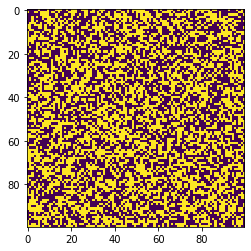

In [61]:
# Python code to implement Conway's Game Of Life
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ON=1
OFF=0
VALUES=[ON,OFF]
HEIGHT = 100
WIDTH = 100

class Game():
    def __init__(self,height:int,width:int):
        self.height=height
        self.width=width  

    def generateMatrix(self):
        return np.random.randint(2, size=(HEIGHT, WIDTH))

    def generateVariation(self,matrix):
        
        return np.vectorize(self._check)(matrix)

    def _check(self,i):
        
        print(i)
        





def update(frameNum, img, grid, N):

	# copy grid since we require 8 neighbors
	# for calculation and we go line by line
	newGrid = grid.copy()
	for i in range(N):
		for j in range(N):

			# compute 8-neighbor sum
			# using toroidal boundary conditions - x and y wrap around
			# so that the simulation takes place on a toroidal surface.
			total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
						grid[(i-1)%N, j] + grid[(i+1)%N, j] +
						grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
						grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)

			# apply Conway's rules
			if grid[i, j] == ON:
				if (total < 2) or (total > 3):
					newGrid[i, j] = OFF
			else:
				if total == 3:
					newGrid[i, j] = ON

	# update data
	img.set_data(newGrid)
	grid[:] = newGrid[:]
	return img,

# main() function
def main():

    g=Game(HEIGHT,WIDTH)
    grid=g.generateMatrix()

    N = 100
    updateInterval = 50

    # set up animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                frames = 10,
                                interval=updateInterval,
                                save_count=50)
    plt.show()

# call main
if __name__ == '__main__':
	main()
